# Парсим 

In [41]:
import json
import os
import matplotlib as plt

In [2]:
texts_with_entities = []
for file in os.listdir('Разметка_все/'):
    if '.json' in file:
        with open(f'Разметка_все/{file}', 'r',  encoding="utf8") as json_data:
            json_text = json.load(json_data)
            
            for text_object in json_text:
                try: 
                    main_text = text_object['result'][list(text_object['result'].keys())[0]]['result']['marks'][0]['text']
                    ents = []
                    for entity_object in text_object['result'][list(text_object['result'].keys())[0]]['result']['marks'][1:]:

                        text = entity_object['text']
                        type_ = entity_object['entityId']
                        start = entity_object['position']['start']
                        end = entity_object['position']['end']

                        ents.append((text, type_, start, end))
                except: pass
                    
                texts_with_entities.append((main_text, ents))

In [3]:
len(texts_with_entities), sum([len(sample[1]) for sample in texts_with_entities])

(744, 35232)

In [4]:
texts_with_entities[0][1]

[('5. Требования, которым должен соответствовать участник отбора по состоянию на 1 число месяца, предшествующего месяцу подачи предложения (заявки):\nу участника отбора должна отсутствовать неисполненная обязанность по уплате налогов, сборов, страховых взносов, пеней, штрафов, процентов, подлежащих уплате в соответствии с законодательством Российской Федерации о налогах и сборах;\nу участника отбора должна отсутствовать просроченная задолженность по возврату в бюджет Республики Татарстан субсидий, бюджетных инвестиций, предоставленных в том числе в соответствии с иными правовыми актами, а также иная просроченная (неурегулированная) задолженность по денежным обязательствам перед Республикой Татарстан;\nучастники отбора - юридические лица не должны находиться в процессе реорганизации (за исключением реорганизации в форме присоединения к юридическому лицу, являющемуся участником отбора, другого юридического лица), ликвидации, в отношении них не введена процедура банкротства, деятельность 

# BIO

# e-obj и другие NE

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize

In [6]:
text_to_sentences = []
for text, _ in texts_with_entities:
    
    sentences_bounds = {}
    start = 0
    
    for sentence in sent_tokenize(text, language='russian'):
        
        end = start + len(sentence)
        end += 1
        
        sentences_bounds[(start, end)] = sentence
        start = end
        
    text_to_sentences.append(sentences_bounds)

In [7]:
text_to_sentences[0]

{(0,
  793): 'Постановление КМ РТ от 28.10.2021 N 1008"Об утверждении Порядка предоставления субсидии из бюджета Республики Татарстан юридическим лицам (за исключением государственных (муниципальных) учреждений) и индивидуальным предпринимателям на возмещение части затрат, связанных со строительством объектов заправки транспортных средств компримированным природным газом"\n\nДокумент предоставлен КонсультантПлюсwww.consultant.ruДата сохранения: 01.04.2022\xa0\n\nОглавление\n\nПостановление\nПорядок предоставления субсидии из бюджета Республики Татарстан юридическим лицам (за исключением государственных (муниципальных) учреждений) и индивидуальным предпринимателям на возмещение части затрат, связанных со строительством объектов заправки транспортных средств компримированным природным газом\n◦Приложение N 1.',
 (793,
  1126): 'Заявление о предоставлении субсидии из бюджета Республики Татарстан юридическим лицам (за исключением государственных (муниципальных) учреждений) и индивидуальным 

In [8]:
texts = [elem[0] for elem in texts_with_entities]
entities = [elem[1] for elem in texts_with_entities]

In [9]:
sum([len(text_to_sentences[i].keys()) for i in range(len(text_to_sentences))])

82361

In [10]:
sentences_with_ents = {}
c = 0
for i in range(len(texts)):
    current_doc_ents = entities[i]
    for sentence_borders in text_to_sentences[i].keys():
        for ent in current_doc_ents:
            if ent[2] > sentence_borders[0] and ent[3] < sentence_borders[1]:
                if (i, sentence_borders[0], sentence_borders[1]) in sentences_with_ents.keys():
                    sentences_with_ents[i, sentence_borders[0], sentence_borders[1]].append((ent[0], ent[1], ent[2], ent[3]))
                else:
                    sentences_with_ents[i, sentence_borders[0], sentence_borders[1]] = [(ent[0], ent[1], ent[2], ent[3])]

In [11]:
len(sentences_with_ents)

5370

In [12]:
sentences_with_ents

{(0,
  3421,
  4983): [('троительству объектов заправки транспортных средств компримированным природным газом ',
   'e-v-transp-zaprav',
   3832,
   3917)],
 (0,
  4986,
  6024): [('о строительству объектов заправки транспортных средств компримированным природным газом',
   'e-v-transp-zaprav',
   5351,
   5438)],
 (0, 6584, 8883): [('участники отбор', 'e-treb-otbor', 8020, 8035),
  ('аправки транспортных средств', 'e-v-transp-zaprav', 7517, 7545),
  ('объект заправки транспортных средств ', 'e-v-transp-zaprav', 6896, 6933)],
 (0,
  9022,
  9278): [('Отбор получателей субсидии п', 'e-treb-otbor', 9026, 9054)],
 (0, 9278, 9596): [('отбора', 'e-treb-otbor', 9306, 9312)],
 (0, 9596, 11640): [('отбора', 'e-treb-otbor', 9626, 9632),
  (' отбора', 'e-treb-otbor', 9662, 9669),
  ('отбора', 'e-treb-otbor', 10423, 10429),
  ('(победителей) отбора ', 'e-treb-otbor', 11209, 11230),
  ('участникам отбор', 'e-treb-otbor', 10944, 10960),
  (' проведении отбора', 'e-treb-otbor', 10996, 11014),
  ('по

In [13]:
def sentence_to_tokens(sentence, current_start):
    tokens = {}
    start_in_sequence = 0
    for token in wordpunct_tokenize(sentence):
        token_start = sentence[start_in_sequence:].find(token) + start_in_sequence + current_start
        token_end = token_start + len(token) - 1
        start_in_sequence = token_end - current_start
        tokens[token_start, token_end] = token  
    return tokens

def find_token(tokens, pos, mode):
    chosen_token = ''
    for token_start, token_end in tokens.keys():
        if token_start < pos < token_end:
            return tokens[token_start, token_end]
        elif token_end >= pos + 1 >= token_start and mode == 'start':
            return tokens[token_start, token_end]
        elif token_start <= pos - 1 <= token_end and mode == 'end':
            return tokens[token_start, token_end]
    
    return chosen_token
        

In [14]:
sentence = 'Мама мыла, раму!'
tokens = sentence_to_tokens(sentence, 100)
find_token(tokens, 104, mode='end'), tokens

('Мама',
 {(100, 103): 'Мама',
  (105, 108): 'мыла',
  (109, 109): ',',
  (111, 114): 'раму',
  (115, 115): '!'})

In [15]:
bio_samples = []
b = 0
e = 0
for text_idx, sent_start, sent_end in sentences_with_ents.keys():
    
    sentence = text_to_sentences[text_idx][(sent_start, sent_end)]
    tokens = sentence_to_tokens(sentence, sent_start)
    tokens_list = list(tokens.values())
    markup = ['O' for token in tokens_list]
    
    for entity in sentences_with_ents[(text_idx, sent_start, sent_end)]:
        
        start_token = find_token(tokens, entity[2], mode='start')
        end_token = find_token(tokens, entity[3], mode='end')
        
        if start_token == end_token and start_token != '':
            markup[tokens_list.index(start_token)] = f'B-{entity[1]}'
        elif start_token != '' and end_token != '':
            markup[tokens_list.index(start_token)] = f'B-{entity[1]}'
            markup[tokens_list.index(end_token)] = f'I-{entity[1]}'
            for i in range(tokens_list.index(start_token) + 1, tokens_list.index(end_token)):
                markup[i] = f'I-{entity[1]}'
            
        
    bio_samples.append((sentence, markup))
len(bio_samples)

5370

In [16]:
wordpunct_tokenize(bio_samples[5][0]), bio_samples[5][1]

(['В',
  'объявлении',
  'о',
  'проведении',
  'отбора',
  'указываются',
  ':',
  'сроки',
  'проведения',
  'отбора',
  ';',
  'дата',
  'начала',
  'подачи',
  'или',
  'окончания',
  'приема',
  'предложений',
  '(',
  'заявок',
  '),',
  'которая',
  'не',
  'может',
  'быть',
  'ранее',
  '30',
  '-',
  'го',
  'календарного',
  'дня',
  ',',
  'следующего',
  'за',
  'днем',
  'размещения',
  'объявления',
  'о',
  'проведении',
  'отбора',
  ';',
  'результаты',
  'предоставления',
  'субсидии',
  'в',
  'соответствии',
  'с',
  'пунктом',
  '17',
  'настоящего',
  'Порядка',
  ';',
  'доменное',
  'имя',
  'и',
  '(',
  'или',
  ')',
  'указатели',
  'страниц',
  'в',
  'едином',
  'портале',
  'бюджетной',
  'системы',
  'Российской',
  'Федерации',
  'в',
  'информационно',
  '-',
  'телекоммуникационной',
  'сети',
  '"',
  'Интернет',
  '"',
  'и',
  'на',
  'официальном',
  'сайте',
  'уполномоченного',
  'органа',
  'в',
  'информационно',
  '-',
  'телекоммуникационной

In [17]:
bio_samples[1]

('Основные понятия, используемые в настоящем Порядке:\nпредложение (заявка) - документы, оформленные на бумажном носителе или в электронной форме, в соответствии с требованиями настоящего Порядка, представляемые для участия в отборе;\nуполномоченный орган - исполнительный орган государственной власти Республики Татарстан, ответственный за реализацию мероприятий по строительству объектов заправки транспортных средств компримированным природным газом, осуществляемых в рамках государственной программы Республики Татарстан "Строительство автомобильных газонаполнительных компрессорных станций на территории Республики Татарстан на 2019 - 2023 годы", утвержденной постановлением Кабинета Министров Республики Татарстан от 18.09.2018 N 789 "Об утверждении государственной программы Республики Татарстан "Строительство автомобильных газонаполнительных компрессорных станций на территории Республики Татарстан на 2019 - 2023 годы", и Федеральных правил, а также ответственный за взаимоотношения с Минис

In [22]:
import pickle


In [19]:
with open('bio_all.pickle', 'wb') as file:
    pickle.dump(bio_samples, file)

In [20]:
with open('bio_all.pickle', 'rb') as file:
    bio = pickle.load(file)

In [24]:
text = []

for i in bio:
    text.append(i[0])

In [25]:
tag = []

for i in bio:
    tag.append(i[1])

In [26]:
list_tuples = list(zip(text, tag))

In [27]:
import pandas as pd 
data = pd.DataFrame(list_tuples, columns=['text', 'tag'])

In [28]:
data

,text,tag
0,Субсидии предоставляются в пределах бюджетных ...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"Основные понятия, используемые в настоящем Пор...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,Доступ к функциям сервиса для участников отбор...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,Отбор получателей субсидии проводится уполномо...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
4,Объявление о проведении отбора размещается на ...,"[O, O, O, B-e-treb-otbor, I-e-treb-otbor, O, O..."
...,...,...
5365,На дату подачи заявления претенденты должны со...,"[O, O, O, O, I-e-treb-rez, O, O, O, O, O, I-e-..."
5366,Настоящий Порядок определяет категории юридиче...,"[O, O, O, O, B-e-org-ul, I-e-org-ul, I-e-org-u..."
5367,В условиях настоящего Порядка используются сле...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
5368,Субсидированию подлежит часть фактически подтв...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [29]:
import nltk
import pymorphy2
!pip install pymorphy2-dicts

### Токенизация

In [36]:
from nltk.tokenize import wordpunct_tokenize
import numpy as np

In [30]:
MORPH = pymorphy2.MorphAnalyzer()

In [32]:
for i in range(len(data)):
    wrds = []
    for wrd in nltk.wordpunct_tokenize(data["text"][i]):
        wrd = MORPH.parse(wrd)[0].normal_form
        wrds.append(wrd)

    data.at[i, "text"] = wrds

In [33]:
data

,text,tag
0,"[субсидия, предоставляться, в, предел, бюджетн...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"[основной, понятие, ,, использовать, в, настоя...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,"[доступ, к, функция, сервис, для, участник, от...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,"[отбор, получатель, субсидия, проводиться, упо...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
4,"[объявление, о, проведение, отбор, размещаться...","[O, O, O, B-e-treb-otbor, I-e-treb-otbor, O, O..."
...,...,...
5365,"[на, дата, подача, заявление, претендент, долж...","[O, O, O, O, I-e-treb-rez, O, O, O, O, O, I-e-..."
5366,"[настоящий, порядок, определять, категория, юр...","[O, O, O, O, B-e-org-ul, I-e-org-ul, I-e-org-u..."
5367,"[в, условие, настоящий, порядок, использоватьс...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
5368,"[субсидирование, подлежать, часть, фактически,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


Возьмем только сущности длиной от 1 до 10

In [37]:
data['count'] = np.nan
for i in range(len(data["tag"])):
    count=0
    for j in range(len(data["tag"][i])):
        if data["tag"][i][j] != "O":
            count +=1
    data["count"][i] = count

C:\Users\PC\AppData\Local\Temp\ipykernel_18632\1541311547.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["count"][i] = count


In [38]:
data["count"].describe()

count    5370.000000
mean       50.911918
std       115.990254
min         0.000000
25%         3.000000
50%         9.000000
75%        40.000000
max      3241.000000
Name: count, dtype: float64

In [43]:
import matplotlib.pyplot as plt

(array([4.60e+03, 3.77e+02, 2.42e+02, 8.00e+01, 4.70e+01, 1.20e+01,
        0.00e+00, 4.00e+00, 0.00e+00, 3.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([   0.        ,  108.03333333,  216.06666667,  324.1       ,
         432.13333333,  540.16666667,  648.2       ,  756.23333333,
         864.26666667,  972.3       , 1080.33333333, 1188.36666667,
        1296.4       , 1404.43333333, 1512.46666667, 1620.5       ,
        1728.53333333, 1836.56666667, 1944.6       , 2052.63333333,
        2160.66666667, 2268.7       , 2376.73333333, 2484.76666667,
        2592.8       , 2700.83333333, 2808.86666667, 2916.9       ,
        3024.93333333, 3132.96666667, 3241.        ]),
 <BarContainer object of 30 artists>)

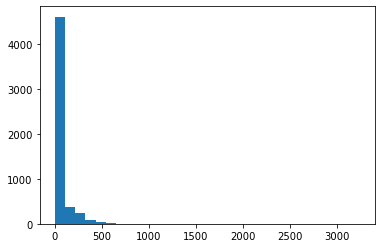

In [44]:
plt.hist(data["count"], bins = 30)

In [45]:
data = data.loc[((data['count'] > 0) & (data['count'] <= 10))]

In [46]:
data

,text,tag,count
0,"[субсидия, предоставляться, в, предел, бюджетн...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",10.0
1,"[основной, понятие, ,, использовать, в, настоя...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",10.0
2,"[доступ, к, функция, сервис, для, участник, от...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",5.0
4,"[объявление, о, проведение, отбор, размещаться...","[O, O, O, B-e-treb-otbor, I-e-treb-otbor, O, O...",2.0
8,"[для, участие, в, отбор, участник, отбор, имет...","[O, O, O, B-e-treb-otbor, I-e-treb-otbor, I-e-...",4.0
...,...,...,...
5360,"[министерство, проводить, отбор, претендент, д...","[O, O, B-e-treb-otbor, I-e-treb-otbor, O, O, O...",2.0
5362,"[порядок, проведение, отбор, 2, ., 1, .]","[O, O, B-e-treb-otbor, I-e-treb-otbor, I-e-tre...",3.0
5363,"[способ, проведение, отбор, указать, в, пункт,...","[O, O, B-e-treb-otbor, I-e-treb-otbor, O, O, O...",2.0
5367,"[в, условие, настоящий, порядок, использоватьс...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",3.0


In [47]:
data =data.drop('count', axis=1)

In [62]:
data.reset_index(drop= True , inplace= True )

In [63]:
data

,text,tag
0,"[субсидия, предоставляться, в, предел, бюджетн...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"[основной, понятие, ,, использовать, в, настоя...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,"[доступ, к, функция, сервис, для, участник, от...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,"[объявление, о, проведение, отбор, размещаться...","[O, O, O, B-e-treb-otbor, I-e-treb-otbor, O, O..."
4,"[для, участие, в, отбор, участник, отбор, имет...","[O, O, O, B-e-treb-otbor, I-e-treb-otbor, I-e-..."
...,...,...
2457,"[министерство, проводить, отбор, претендент, д...","[O, O, B-e-treb-otbor, I-e-treb-otbor, O, O, O..."
2458,"[порядок, проведение, отбор, 2, ., 1, .]","[O, O, B-e-treb-otbor, I-e-treb-otbor, I-e-tre..."
2459,"[способ, проведение, отбор, указать, в, пункт,...","[O, O, B-e-treb-otbor, I-e-treb-otbor, O, O, O..."
2460,"[в, условие, настоящий, порядок, использоватьс...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


### Данные в числовой вид

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [50]:
maxlen = max([len(s) for s in data["text"]])
maxlen

807

In [51]:
tokenizer1 = Tokenizer(num_words=3295, filters="!»#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n")
# Токенайзер обновляет словарь токенов в соответствии с частотой вхождения слов.
tokenizer1.fit_on_texts(data["text"])

In [53]:
sequences1 = tokenizer1.texts_to_sequences(data["text"])

In [54]:
word_indexes = tokenizer1.word_index
word_indexes

{',': 1,
 'в': 2,
 '.': 3,
 'и': 4,
 'на': 5,
 '(': 6,
 'субсидия': 7,
 '-': 8,
 ')': 9,
 'отбор': 10,
 '"': 11,
 'предоставление': 12,
 'порядок': 13,
 'область': 14,
 'с': 15,
 'по': 16,
 'о': 17,
 'далее': 18,
 ';': 19,
 'получатель': 20,
 'год': 21,
 'настоящий': 22,
 'не': 23,
 'министерство': 24,
 'бюджет': 25,
 'российский': 26,
 'от': 27,
 'лицо': 28,
 'или': 29,
 'n': 30,
 'средство': 31,
 'федерация': 32,
 'проведение': 33,
 'соответствие': 34,
 'за': 35,
 'государственный': 36,
 '1': 37,
 '2': 38,
 'цель': 39,
 'бюджетный': 40,
 'для': 41,
 'являться': 42,
 '),': 43,
 'который': 44,
 'организация': 45,
 'пункт': 46,
 'затрата': 47,
 'хозяйство': 48,
 ').': 49,
 'финансовый': 50,
 'юридический': 51,
 'сельскохозяйственный': 52,
 'заявка': 53,
 'из': 54,
 'к': 55,
 'возмещение': 56,
 'правительство': 57,
 'постановление': 58,
 'а': 59,
 'развитие': 60,
 'сельский': 61,
 'территория': 62,
 'предоставляться': 63,
 'областной': 64,
 'грант': 65,
 ':': 66,
 'форма': 67,
 'край': 6

In [55]:
tokenizer2 = Tokenizer(num_words=3295, filters="!»#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n")
# Токенайзер обновляет словарь токенов в соответствии с частотой вхождения слов.
tokenizer2.fit_on_texts(data["tag"])

In [57]:
sequences2 = tokenizer2.texts_to_sequences(data["tag"])

In [58]:
tag_indexes = tokenizer2.word_index
tag_indexes

{'o': 1,
 'i-e-org-ul': 2,
 'i-e-treb-otbor': 3,
 'i-e-v-selh': 4,
 'b-e-treb-otbor': 5,
 'b-e-org-ul': 6,
 'i-e-v-transp': 7,
 'b-e-v-selh': 8,
 'i-e-org-ip': 9,
 'i-e-reg-msp': 10,
 'b-e-v-transp': 11,
 'i-e-v-selh-anim': 12,
 'i-e-v-gkh': 13,
 'i-e-org-lph': 14,
 'i-e-prod-cred': 15,
 'i-e-org-coop-spok': 16,
 'i-e-v-transp-gd': 17,
 'i-e-org-kfl': 18,
 'i-e-v-selh-fish': 19,
 'i-e-v-selh-rast-zerno': 20,
 'b-e-org-ip': 21,
 'b-e-v-selh-anim': 22,
 'i-e-prod-liz': 23,
 'i-e-v-transp-air': 24,
 'i-e-v-selh-rast': 25,
 'i-e-v-transp-zaprav': 26,
 'b-e-v-gkh': 27,
 'b-e-reg-msp': 28,
 'b-e-v-selh-fish': 29,
 'b-e-prod-cred': 30,
 'i-e-v-selh-anim-krs': 31,
 'i-e-v-tur-child': 32,
 'i-e-v-selh-anim-krs-milk': 33,
 'i-e-v-tur': 34,
 'b-e-v-selh-rast': 35,
 'i-e-treb-reg': 36,
 'i-e-org-coop-coop': 37,
 'i-e-v-eda-eda': 38,
 'i-e-obj': 39,
 'b-e-org-lph': 40,
 'b-e-org-coop-spok': 41,
 'b-e-prod-liz': 42,
 'b-e-org-kfl': 43,
 'i-e-treb-dogov': 44,
 'i-e-v-selh-anim-krs-plemya': 45,
 'b-e-

In [60]:
n_token = len(list(set(word_indexes)))
n_token

3599

In [64]:
data["text_ind"] = list(map(list, data["text"]))

In [65]:
for i in range(len(data["text"])):
    data.at[i, "text_ind"] = sequences1[i]

In [67]:
data["tag_ind"] = list(map(list, data["tag"]))

In [68]:
for i in range(len(data["tag"])):
    data.at[i, "tag_ind"] = sequences2[i]

In [70]:
data

,text,tag,text_ind,tag_ind
0,"[субсидия, предоставляться, в, предел, бюджетн...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[7, 63, 2, 212, 40, 288, 4, 128, 40, 90, 1, 17...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[основной, понятие, ,, использовать, в, настоя...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[1141, 586, 1, 346, 2, 22, 13, 66, 125, 6, 53,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[доступ, к, функция, сервис, для, участник, от...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[1423, 55, 479, 1300, 41, 92, 10, 134, 926, 16...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[объявление, о, проведение, отбор, размещаться...","[O, O, O, B-e-treb-otbor, I-e-treb-otbor, O, O...","[95, 17, 33, 10, 310, 5, 122, 178, 40, 210, 26...","[1, 1, 1, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"[для, участие, в, отбор, участник, отбор, имет...","[O, O, O, B-e-treb-otbor, I-e-treb-otbor, I-e-...","[41, 104, 2, 10, 92, 10, 204, 150, 440, 125, 6...","[1, 1, 1, 5, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...
2457,"[министерство, проводить, отбор, претендент, д...","[O, O, B-e-treb-otbor, I-e-treb-otbor, O, O, O...","[24, 377, 10, 613, 41, 12, 7, 6, 18, 8, 10, 49]","[1, 1, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1]"
2458,"[порядок, проведение, отбор, 2, ., 1, .]","[O, O, B-e-treb-otbor, I-e-treb-otbor, I-e-tre...","[13, 33, 10, 38, 3, 37, 3]","[1, 1, 5, 3, 3, 1, 1]"
2459,"[способ, проведение, отбор, указать, в, пункт,...","[O, O, B-e-treb-otbor, I-e-treb-otbor, O, O, O...","[214, 33, 10, 329, 2, 46, 37, 3, 237, 22, 133, 3]","[1, 1, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1]"
2460,"[в, условие, настоящий, порядок, использоватьс...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[2, 70, 22, 13, 675, 131, 586, 66, 47, 52, 97,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


#### Сохраним датасет

In [71]:
data.to_pickle('data_withBI.pickle')

In [72]:
data = pd.read_pickle('data_withBI.pickle')

In [75]:
with open('dict_tegs.pkl', 'wb') as f:
    pickle.dump(tag_indexes, f)

In [76]:
with open('dict_words.pkl', 'wb') as f:
    pickle.dump(word_indexes, f)